# 🔎 Bias & Source Diversity Checker
Analyze search result bias and source diversity using the Exa AI API

## 🎯 Project Goal
The purpose of this project is to analyze search results for a given query to determine:

- Which domains dominate the results  
- How diverse the sources are  
- Sentiment or bias across different sources  

## 🗺️ Workflow

1. **Data Collection:** Fetch search results using the Exa API  
2. **Preprocessing:** Extract domains and clean snippets  
3. **Diversity Analysis:** Compute metrics like Herfindahl-Hirschman Index (HHI), Shannon entropy, and Gini coefficient  
4. **Sentiment Analysis:** Evaluate sentiment of snippets across domains  
5. **Visualization:** Display results using bar charts, pie charts, and heatmaps  
6. **Insights:** Summarize key findings about bias and source diversity

## 🧰 Modules / Libraries Used

- **exa_py**: Connects to the Exa AI search API  
- **pandas**: Data manipulation and storage  
- **numpy**: Numerical operations  
- **transformers**: HuggingFace library for sentiment analysis  
- **matplotlib** & **seaborn**: Data visualization  

## 🏗️ BiasDiversityCheck Class

This class encapsulates the following functionalities:

- Fetch search results from Exa API
- Extract and process domain information
- Compute diversity metrics:
  - Top domain share %
  - Herfindahl-Hirschman Index (HHI)
  - Shannon entropy
  - Gini coefficient
- Perform sentiment analysis on snippets using HuggingFace
- Visualize distribution of sources and sentiments

In [1]:
import importlib
import search
importlib.reload(search)

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


<module 'search' from '/Users/tianalongjam/Downloads/School🏫/Coding/projects/new-search-engine-with-exa-ai/search.py'>

In [2]:
qsearch = search.BiasDiversityCheck(query="AI Ethics", target = 50)
qsearch

The query you provided is AI Ethics for 50 results

### 📥 `get_responses`
Fetches search results from the Exa API and stores them in a DataFrame.

**Purpose:**
- Collect results in batches (`self.page` per request) until the total target is reached.
- Extract useful fields: title, URL, published date, author, snippet, domain.
- Compute domain counts and shares.

**Returns:** `self.df` containing the processed results.


In [3]:
df = qsearch.get_responses()

### 👑 `find_dominant_domain`
Identifies if a single domain dominates the search results.

**Purpose:**
- Calculate the share % of the most frequent domain.
- Determine dominance: if top domain >= 50%, it is considered dominant.

**Returns:** String indicating dominant domain or no dominance.


In [4]:
qsearch.find_dominant_domain()

'No particular domain dominates your search results'

### 1️⃣ Herfindahl-Hirschman Index (HHI)
**Definition:**  
HHI is a measure of concentration often used in economics to quantify how “dominant” certain entities are in a market. Here, it measures how concentrated search results are among domains.

**Calculation:**  
$$
HHI = \sum_{i=1}^{N} s_i^2
$$
where $s_i$ is the share (proportion) of domain $i$ among all results, and $N$ is the total number of domains.

**Interpretation:**  
- **HHI = 1** → all results come from a single domain (maximum concentration)  
- **HHI ≈ 1/N** → results evenly distributed across all domains  
- **HHI < 0.15** → unconcentrated / diverse  
- **HHI 0.15–0.25** → moderately concentrated  
- **HHI > 0.25** → highly concentrated / biased 

In [5]:
qsearch.find_hhi()

'The computed HHI for this query indicates an unconcentrated distribution of sources. No single domain dominates the search results, suggesting a diverse set of perspectives.'

### 2️⃣ Gini Coefficient
**Definition:**  
The Gini coefficient measures inequality among values. In this context, it quantifies how unevenly search results are distributed across domains.

**Range:**  
$$
0 \leq \text{Gini} \leq 1
$$

**Calculation:**
$$
G = - \sum_{i=1}^{N} s_i \cdot \log(s_i)
$$


**Interpretation:**  
- **Gini = 0** → perfect equality (all domains have same number of results)  
- **Gini = 1** → maximum inequality (all results come from a single domain)
- **Gini < 0.25** → low inequality / diverse  
- **Gini 0.25–0.5** → moderate inequality  
- **Gini 0.5–1.0** → high inequality / few domains dominate  

**Where:**
- \(n\) = number of domains  
- \(x_i\) = number of results from domain \(i\)  
- \(\bar{x}\) = mean number of results across all domains  



In [6]:
qsearch.find_shannon_entropy()

'The normalized entropy for this query is in the high range, meaning the results are well-distributed across many domains. No single source dominates, suggesting a broad and balanced range of perspectives in the retrieved information.'

### 3️⃣ Shannon Entropy
**Definition:**  
Entropy measures uncertainty or randomness in a distribution. Higher entropy means more evenly spread search results across domains.

**Calculation:**  
$$
H = - \sum_{i=1}^{N} s_i \cdot \log(s_i)
$$ 
where $s_i$ is the proportion of results from domain $i$.

**Interpretation:**  
- **Low entropy → concentrated / few dominant domains**  
- **Moderate entropy → some diversity but uneven**  
- **High entropy → results evenly spread / diverse perspectives**

In [7]:
qsearch.find_gini()

'The Gini coefficient for this query falls in the low range, suggesting that the results are fairly evenly distributed across domains. No single source dominates, and the overall diversity of perspectives is strong.'

### 😃 `sentiment_analysis`
Performs sentiment analysis on search result snippets (or titles if missing).

**Purpose:**
- Uses HuggingFace sentiment pipeline (distilbert-base-uncased-finetuned-sst-2-english).
- Maps POSITIVE/NEGATIVE sentiment to a [-1,1] scale.
- Adds a new column `Sentiment` in `self.df`.

**Returns:** DataFrame with columns:
- Title
- Snippet
- Sentiment (score)

In [8]:
qsearch.sentiment_analysis()

Device set to use mps:0


,Title,Snippet,Sentiment
0,"AI Ethics: What It Is, Why It Matters, and Mor...",None,0.918349
1,What is AI Ethics? | IBM,None,-0.994391
2,The Pentagon’s AI Ethics Push: Keeping Machine...,None,-0.897151
3,Ethics of Artificial Intelligence | UNESCO,None,-0.956915
4,AI and the Ethics of Decision-Making in Law an...,None,0.978718
5,Ethics of artificial intelligence - Wikipedia,None,-0.990360
6,The ethics of AI,None,-0.904324
7,Addressing equity and ethics in artificial int...,None,0.996145
8,Ethics of AI,None,-0.845922
9,AI Ethics: Global Perspectives,None,0.860292


### 📊 `visualize`
Generates visualizations to help interpret the diversity and sentiment of search results.

**Purpose:**
- Show distribution of top domains and highlight any dominance.
- Visualize sentiment trends across different sources.

**Visualizations Included:**
1. **Bar chart:** Top 10 domains by count  
   - Quickly shows which domains appear most frequently in search results.

2. **Pie chart:** Domain share of top 10 domains  
   - Highlights relative proportion of each domain visually.

3. **Heatmap:** Average sentiment by domain  
   - Displays mean sentiment for each domain on a color scale (negative → red, positive → blue).  
   - Helps identify if certain sources tend to be more positive or negative.

**Requirements:** Must run `get_responses()` and `sentiment_analysis()` first to have `self.df` populated with domains and sentiment scores.


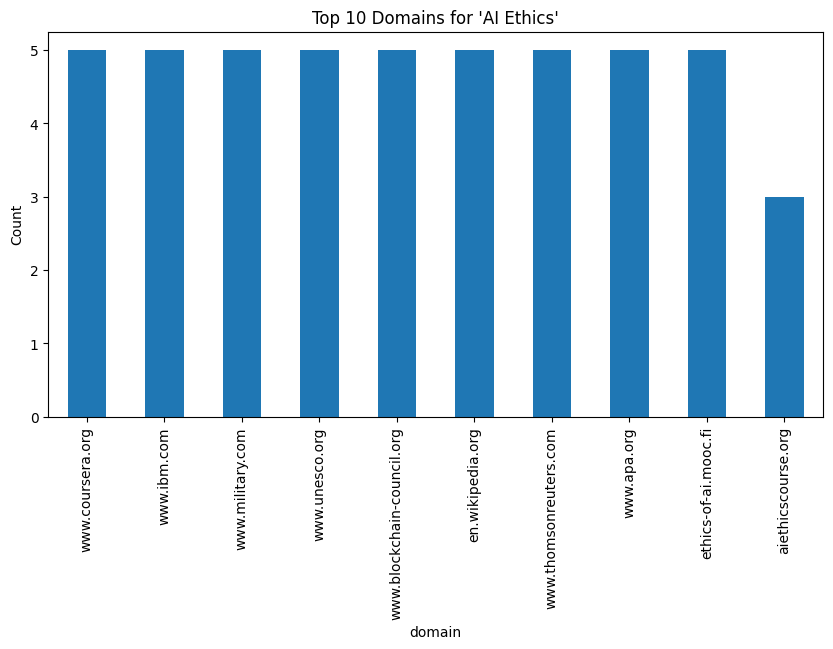

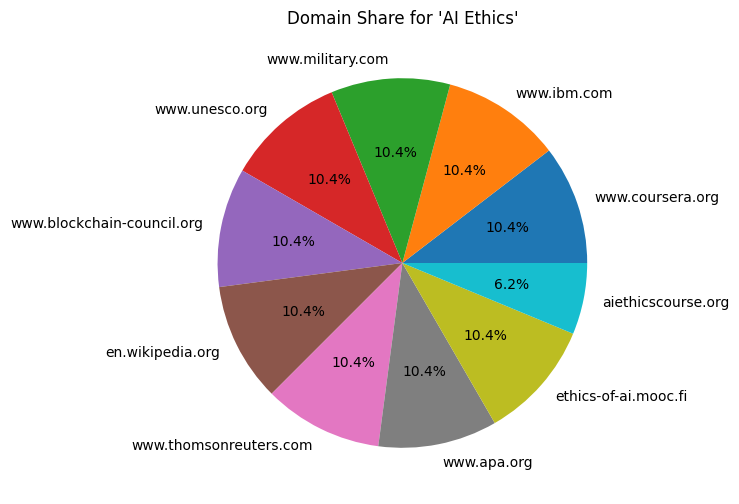

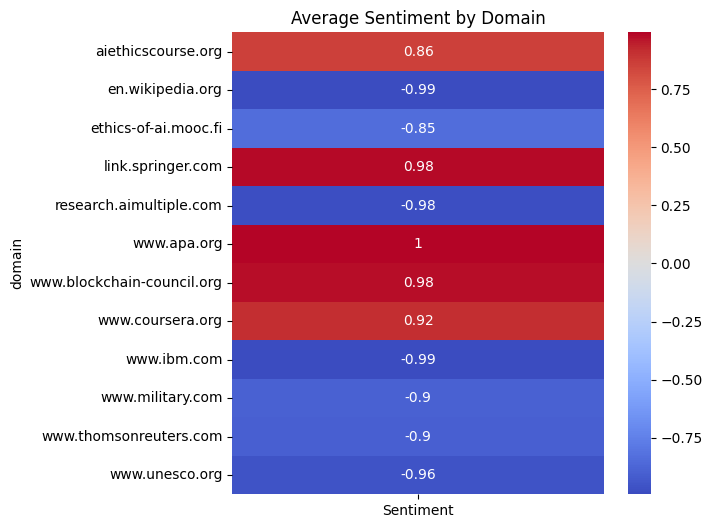

In [9]:
qsearch.visualize()